<a href="https://colab.research.google.com/github/jaanvinambiar/Zomato-Rating-Prediction/blob/main/Zomato_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/read.csv')

In [ ]:
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time_min_order,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu
0,1 more outlet in Mumbai,True,"₹1,500","Finger Food, Continental, European, Italian",NaN,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True
1,1 more outlet in Mumbai,True,₹800,Pizza,NaN,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True
2,NaN,True,"₹2,500",Seafood,NaN,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True
3,NaN,True,"₹1,800","Finger Food, Continental",NaN,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True
4,2 more outlets in Mumbai,True,₹450,"North Indian, Street Food, Fast Food, Chinese",45 min ...,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True


In [ ]:
df.shape

(7285, 13)

In [ ]:
df.isnull().sum()

Additional_outlet_count    6285
Call                          0
Cost_for_two                  0
Cuisines                      1
Delivery_Time_min_order    4771
Features                   5695
Home_Delivery                 0
Operational_hours            12
Rating_votes                  0
Restaurant_Location          19
Restaurant_Name               0
Restaurant_Type             656
View_Menu                     0
dtype: int64

In [ ]:
df.dtypes

Additional_outlet_count    object
Call                         bool
Cost_for_two               object
Cuisines                   object
Delivery_Time_min_order    object
Features                   object
Home_Delivery                bool
Operational_hours          object
Rating_votes               object
Restaurant_Location        object
Restaurant_Name            object
Restaurant_Type            object
View_Menu                    bool
dtype: object

# Additional outlet count

In [ ]:
df['Additional_outlet_count'] = df['Additional_outlet_count'].str.replace('more outlet in Mumbai','')
df['Additional_outlet_count'] = df['Additional_outlet_count'].str.replace('more outlets in Mumbai','')
df['Additional_outlet_count']

0        1 
1        1 
2       NaN
3       NaN
4        2 
       ... 
7280    NaN
7281    NaN
7282    NaN
7283    NaN
7284    NaN
Name: Additional_outlet_count, Length: 7285, dtype: object

In [ ]:
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time_min_order,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu
0,1,True,"₹1,500","Finger Food, Continental, European, Italian",NaN,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True
1,1,True,₹800,Pizza,NaN,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True
2,NaN,True,"₹2,500",Seafood,NaN,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True
3,NaN,True,"₹1,800","Finger Food, Continental",NaN,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True
4,2,True,₹450,"North Indian, Street Food, Fast Food, Chinese",45 min ...,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True


In [ ]:
df['Additional_outlet_count'] = df['Additional_outlet_count'].astype(float)
df['Additional_outlet_count'] = df['Additional_outlet_count'].fillna(df['Additional_outlet_count'].mean())
df['Additional_outlet_count'] = df['Additional_outlet_count'].astype(int)
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time_min_order,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu
0,1,True,"₹1,500","Finger Food, Continental, European, Italian",NaN,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True
1,1,True,₹800,Pizza,NaN,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True
2,4,True,"₹2,500",Seafood,NaN,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True
3,4,True,"₹1,800","Finger Food, Continental",NaN,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True
4,2,True,₹450,"North Indian, Street Food, Fast Food, Chinese",45 min ...,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True


# Cost

In [ ]:
df['Cost_for_two'] = df['Cost_for_two'].str.replace(',', '')
df['Cost_for_two'] = df['Cost_for_two'].str.replace('₹', '')
df['Cost_for_two']

0       1500
1        800
2       2500
3       1800
4        450
        ... 
7280     600
7281     550
7282     350
7283    2000
7284     600
Name: Cost_for_two, Length: 7285, dtype: object

In [ ]:
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time_min_order,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu
0,1,True,1500,"Finger Food, Continental, European, Italian",NaN,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True
1,1,True,800,Pizza,NaN,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True
2,4,True,2500,Seafood,NaN,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True
3,4,True,1800,"Finger Food, Continental",NaN,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True
4,2,True,450,"North Indian, Street Food, Fast Food, Chinese",45 min ...,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True


# Delivery Time and Cost

In [ ]:
df.rename(columns={'Delivery_Time_min_order':'Delivery_Time'},inplace=True)

In [ ]:
df['Delivery_Time'] = df['Delivery_Time'].str.replace('min','')
df['Delivery_Time'][4]

'45                                                                              ·                                                                             Rs. 0'

In [ ]:
df[['Delivery_Time','Delivery_cost']] = df['Delivery_Time'].str.split('                                                                              ·                                                                         ',expand=True)
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Delivery_cost
0,1,True,1500,"Finger Food, Continental, European, Italian",NaN,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,NaN
1,1,True,800,Pizza,NaN,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True,NaN
2,4,True,2500,Seafood,NaN,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True,NaN
3,4,True,1800,"Finger Food, Continental",NaN,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True,NaN
4,2,True,450,"North Indian, Street Food, Fast Food, Chinese",45,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True,Rs. 0


### Delivery Time

In [ ]:
df['Delivery_Time'] = df['Delivery_Time'].astype(float)
df['Delivery_Time'] = df['Delivery_Time'].fillna(df['Delivery_Time'].mean())
df['Delivery_Time'] = df['Delivery_Time'].astype(int)
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Delivery_cost
0,1,True,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,NaN
1,1,True,800,Pizza,45,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True,NaN
2,4,True,2500,Seafood,45,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True,NaN
3,4,True,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True,NaN
4,2,True,450,"North Indian, Street Food, Fast Food, Chinese",45,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True,Rs. 0


### Delivery Cost

In [ ]:
df['Delivery_cost'][4]

'    Rs. 0'

In [ ]:
def handle_del_cost(value):
  value = str(value)
  if '    Rs. ' in value:
    value = value.replace('    Rs. ','')
    return value
  else:
    return value
df['Delivery_cost'] = df['Delivery_cost'].apply(handle_del_cost)
df['Delivery_cost'].head(10)

0    nan
1    nan
2    nan
3    nan
4      0
5    nan
6      0
7     99
8    nan
9    nan
Name: Delivery_cost, dtype: object

In [ ]:
df['Delivery_cost'] = df['Delivery_cost'].astype(float)
df['Delivery_cost'] = df['Delivery_cost'].fillna(df['Delivery_cost'].mean())
df['Delivery_cost'] = df['Delivery_cost'].astype(int)
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Rating_votes,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Delivery_cost
0,1,True,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),4.9 132...,Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,76
1,1,True,800,Pizza,45,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),4.6 597...,Malad West,Joey's Pizza,Quick Bites,True,76
2,4,True,2500,Seafood,45,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...",4.5 143...,"Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True,76
3,4,True,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),4.9 327...,Lower Parel,Tamasha,"Lounge,Bar",True,76
4,2,True,450,"North Indian, Street Food, Fast Food, Chinese",45,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",4.1 142...,Vashi,Bhagat Tarachand,Casual Dining,True,0


**Rating**

In [ ]:
new = df["Rating_votes"].str.split(" ", n = 1, expand = True)

In [ ]:
df["Rating"]= new[0]


In [ ]:
df["votes"]= new[1]

In [ ]:
del df['Rating_votes']
df

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Delivery_cost,Rating,votes
0,1,True,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,76,4.9,1326 votes
1,1,True,800,Pizza,45,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,76,4.6,5974 votes
2,4,True,2500,Seafood,45,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...","Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True,76,4.5,1438 votes
3,4,True,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,76,4.9,3275 votes
4,2,True,450,"North Indian, Street Food, Fast Food, Chinese",45,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,0,4.1,1422 votes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7280,4,True,600,"South Indian, North Indian, Chinese, Fast Food...",45,NaN,True,8am – 12midnight (Mon-Sun),Chembur,Hotel Shreedevi,Casual Dining,True,99,3.5,115 votes
7281,4,True,550,"Fast Food, North Indian",20,NaN,True,"9am – 9pm (Mon, Wed, Thu, Fri, Sat, Sun), Clos...","Pali Hill, Bandra West",Mac Craig,Quick Bites,True,99,3.5,121 votes
7282,4,True,350,"Fast Food, Beverages, Rolls",45,NaN,False,8am – 1:30am (Mon-Sun),Juhu,Ice n Rolls,Quick Bites,True,76,3.5,213 votes
7283,4,True,2000,"Seafood, Chinese",40,NaN,True,12noon – 12:30AM (Mon-Sun),"Hotel King's International, Juhu",Temple Flower - Hotel Kings International,Casual Dining,True,99,2.6,195 votes


In [ ]:
df['Rating'].unique()

array(['4.9', '4.6', '4.5', '4.1', '4.8', '4.4', '4.7', 'NEW', '3.9',
       '4.0', '4.2', '4.3', '3.8', '3.7', '3.6', '3.4', '3.5', '2.9',
       '3.1', '3.3', '2.7', '3.2', '2.8', '2.4', '3.0', '2.1', '2.6',
       '2.5', '2.3', '-', '2.0', '2.2', 'Opening'], dtype=object)

In [ ]:
df['Rating'] = np.where((df.Rating == '-'),'0',df.Rating)

In [ ]:
df['Rating'].unique()

array(['4.9', '4.6', '4.5', '4.1', '4.8', '4.4', '4.7', 'NEW', '3.9',
       '4.0', '4.2', '4.3', '3.8', '3.7', '3.6', '3.4', '3.5', '2.9',
       '3.1', '3.3', '2.7', '3.2', '2.8', '2.4', '3.0', '2.1', '2.6',
       '2.5', '2.3', '0', '2.0', '2.2', 'Opening'], dtype=object)

In [ ]:
df['Rating'] = np.where((df.Rating == 'NEW'),'0',df.Rating)

In [ ]:
df['Rating'] = np.where((df.Rating == 'Opening'),'0',df.Rating)

In [ ]:
df['Rating'].unique()

array(['4.9', '4.6', '4.5', '4.1', '4.8', '4.4', '4.7', '0', '3.9', '4.0',
       '4.2', '4.3', '3.8', '3.7', '3.6', '3.4', '3.5', '2.9', '3.1',
       '3.3', '2.7', '3.2', '2.8', '2.4', '3.0', '2.1', '2.6', '2.5',
       '2.3', '2.0', '2.2'], dtype=object)

 Votes

In [ ]:
df['votes'] = df['votes'].str.replace('votes','')
df['votes']

0                                              1326 
1                                              5974 
2                                              1438 
3                                              3275 
4                                              1422 
                            ...                     
7280                                            115 
7281                                            121 
7282                                            213 
7283                                            195 
7284                                             53 
Name: votes, Length: 7285, dtype: object

In [ ]:
df['votes'].head(10)

0                                           1326 
1                                           5974 
2                                           1438 
3                                           3275 
4                                           1422 
5                                           1989 
6                                           1424 
7                                           2640 
8                                           4752 
9                                            None
Name: votes, dtype: object

In [ ]:
def handlevot(value):
    value=str(value)
    if(value=='None' or value=='Soon'):
        value = '0'
        return value
    else:
        return value
df['votes'] = df['votes'].apply(handlevot)

In [ ]:
df.votes = df.votes.astype(int)
mean_vot = df.votes.mean()
mean_vot = int(mean_vot)
def meanvot(value):
    if(value==0):
        value = mean_vot
        return value
    else:
        return value
df['votes'] = df['votes'].apply(meanvot)
df['votes'].head(10)

0    1326
1    5974
2    1438
3    3275
4    1422
5    1989
6    1424
7    2640
8    4752
9     238
Name: votes, dtype: int64

In [ ]:
df.head()

,Additional_outlet_count,Call,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,View_Menu,Delivery_cost,Rating,votes
0,1,True,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",True,76,4.9,1326
1,1,True,800,Pizza,45,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,True,76,4.6,5974
2,4,True,2500,Seafood,45,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...","Linking Road, Bandra West",Bastian,"Casual Dining,Bar",True,76,4.5,1438
3,4,True,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",True,76,4.9,3275
4,2,True,450,"North Indian, Street Food, Fast Food, Chinese",45,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,True,0,4.1,1422


 Call and View Menu

In [ ]:
df['Call'].unique()

array([ True])

In [ ]:
del df['Call']

In [ ]:
df['View_Menu'].unique()

array([ True])

In [ ]:
del df['View_Menu']

In [ ]:
df.head()

,Additional_outlet_count,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,Delivery_cost,Rating,votes
0,1,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",False,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",76,4.9,1326
1,1,800,Pizza,45,"Value For Money, Best of Mumbai",False,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,76,4.6,5974
2,4,2500,Seafood,45,"Super Seafood, Best of Mumbai",False,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...","Linking Road, Bandra West",Bastian,"Casual Dining,Bar",76,4.5,1438
3,4,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",False,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",76,4.9,3275
4,2,450,"North Indian, Street Food, Fast Food, Chinese",45,NaN,True,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,0,4.1,1422


Home Delivery

In [ ]:
df['Home_Delivery'] = df['Home_Delivery'].astype(int)
df['Home_Delivery']

0       0
1       0
2       0
3       0
4       1
       ..
7280    1
7281    1
7282    0
7283    1
7284    0
Name: Home_Delivery, Length: 7285, dtype: int64

In [ ]:
df.head()

,Additional_outlet_count,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,Delivery_cost,Rating,votes
0,1,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",0,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,"Lounge,Casual Dining",76,4.9,1326
1,1,800,Pizza,45,"Value For Money, Best of Mumbai",0,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,76,4.6,5974
2,4,2500,Seafood,45,"Super Seafood, Best of Mumbai",0,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...","Linking Road, Bandra West",Bastian,"Casual Dining,Bar",76,4.5,1438
3,4,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",0,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,"Lounge,Bar",76,4.9,3275
4,2,450,"North Indian, Street Food, Fast Food, Chinese",45,NaN,1,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,0,4.1,1422


## Cuisines

In [ ]:
df['Cuisines'].isna().sum()

1

In [ ]:
df['Cuisines'] = df['Cuisines'].fillna("")
df['Cuisine_count'] = df['Cuisines'].apply(lambda n:len(n.split(',')))
df[['Cuisines','Cuisine_count']]

,Cuisines,Cuisine_count
0,"Finger Food, Continental, European, Italian",4
1,Pizza,1
2,Seafood,1
3,"Finger Food, Continental",2
4,"North Indian, Street Food, Fast Food, Chinese",4
...,...,...
7280,"South Indian, North Indian, Chinese, Fast Food...",5
7281,"Fast Food, North Indian",2
7282,"Fast Food, Beverages, Rolls",3
7283,"Seafood, Chinese",2


## Features

In [ ]:
df['Features'].isna().sum()

5695

In [ ]:
df['Features'] = df['Features'].fillna("")
df['Feature_count'] = df['Features'].apply(lambda n:len(n.split(',')))
df[['Features','Feature_count']]

,Features,Feature_count
0,"Food Hygiene Rated Restaurants In Mumbai, Best...",2
1,"Value For Money, Best of Mumbai",2
2,"Super Seafood, Best of Mumbai",2
3,"Where's The Party?, Best of Mumbai, Food Hygie...",3
4,,1
...,...,...
7280,,1
7281,,1
7282,,1
7283,,1


## Restaurant type

In [ ]:
df['Restaurant_Type'].isna().sum()

656

In [ ]:
df['Restaurant_Type'] = df['Restaurant_Type'].fillna("")
df['Rest_type_count'] = df['Restaurant_Type'].apply(lambda n:len(n.split(',')))
df[['Restaurant_Type','Rest_type_count']]

,Restaurant_Type,Rest_type_count
0,"Lounge,Casual Dining",2
1,Quick Bites,1
2,"Casual Dining,Bar",2
3,"Lounge,Bar",2
4,Casual Dining,1
...,...,...
7280,Casual Dining,1
7281,Quick Bites,1
7282,Quick Bites,1
7283,Casual Dining,1


In [ ]:
df['Restaurant_Type'].value_counts()

Casual Dining                 2899
Quick Bites                   1976
                               656
Café                           264
Dessert Parlor                 252
                              ... 
Irani Cafe                       1
Microbrewery,Bar                 1
Casual Dining,Cocktail Bar       1
Irani Cafe,Bakery                1
Bar,Fine Dining                  1
Name: Restaurant_Type, Length: 76, dtype: int64

In [ ]:
Type = df['Restaurant_Type'].value_counts(ascending=False)
Type_50 = Type[Type<50]

def handletype(value):
  value=str(value)
  if value in Type_50:
    return 'Others'
  else:
    return value

df['Restaurant_Type'] = df['Restaurant_Type'].apply(handletype)
df['Restaurant_Type'].value_counts()

Casual Dining            2899
Quick Bites              1976
                          656
Others                    483
Café                      264
Dessert Parlor            252
Bakery                    214
Casual Dining,Bar         164
Fine Dining               133
Beverage Shop              65
Lounge                     61
Bakery,Dessert Parlor      61
Sweet Shop                 57
Name: Restaurant_Type, dtype: int64

In [ ]:
df.head()

,Additional_outlet_count,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,Delivery_cost,Rating,votes,Cuisine_count,Feature_count,Rest_type_count
0,1,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",0,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,Others,76,4.9,1326,4,2,2
1,1,800,Pizza,45,"Value For Money, Best of Mumbai",0,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,76,4.6,5974,1,2,1
2,4,2500,Seafood,45,"Super Seafood, Best of Mumbai",0,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...","Linking Road, Bandra West",Bastian,"Casual Dining,Bar",76,4.5,1438,1,2,2
3,4,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",0,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,Others,76,4.9,3275,2,3,2
4,2,450,"North Indian, Street Food, Fast Food, Chinese",45,,1,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,0,4.1,1422,4,1,1


# Data Visualization

Most Popular Restaurant chain

Text(0.5, 0, 'Number of outlets')

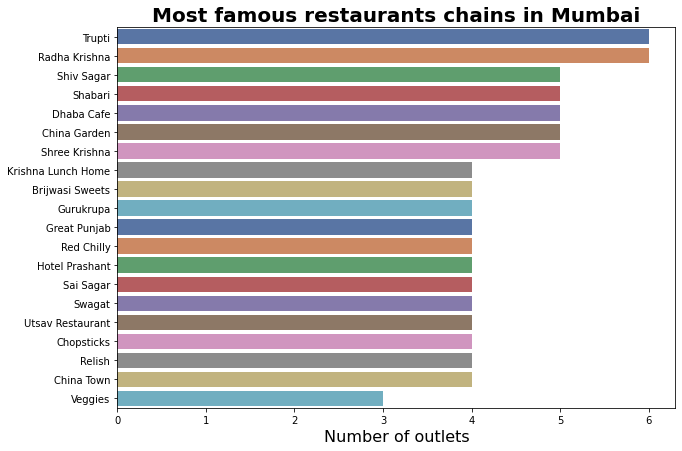

In [ ]:
plt.figure(figsize=(10,7))
chains=df['Restaurant_Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Mumbai",fontsize =20, weight = 'bold')
plt.xlabel("Number of outlets",fontsize =16)

Most Popular restaurants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'count')

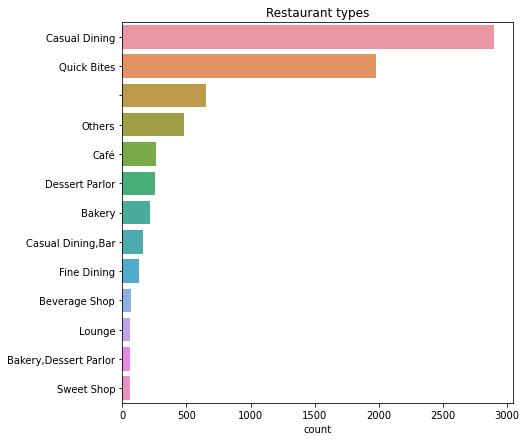

In [ ]:
plt.figure(figsize=(7,7))
rest=df['Restaurant_Type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

Popular Cuisines

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Most popular cuisines')

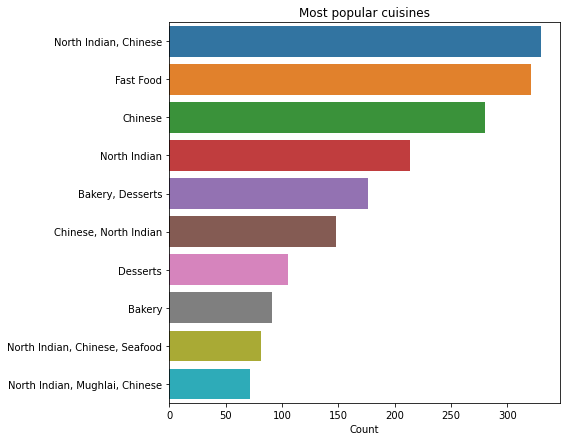

In [ ]:
plt.figure(figsize=(7,7))
cuisines=df['Cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular cuisines")

Locations with most restaurants

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


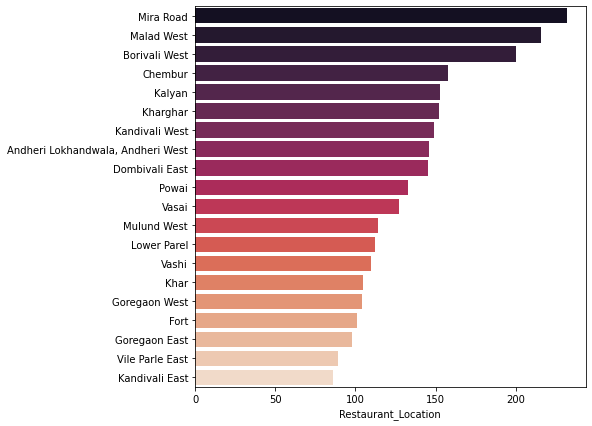

In [ ]:
plt.figure(figsize=(7,7))
Rest_locations=df['Restaurant_Location'].value_counts()[:20]
sns.barplot(Rest_locations,Rest_locations.index,palette="rocket")

Average cost for two

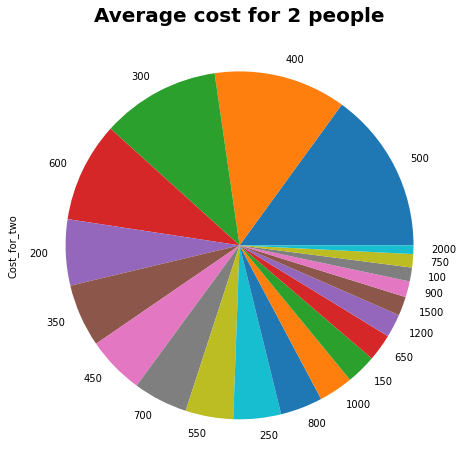

In [ ]:
plt.figure(figsize = (12,8))
df['Cost_for_two'].value_counts()[:20].plot(kind = 'pie')
plt.title('Average cost for 2 people', fontsize =20, weight = 'bold')
plt.show()

Average Rating

In [ ]:
df['Rating'] = df['Rating'].astype(float)

3.261043239533291


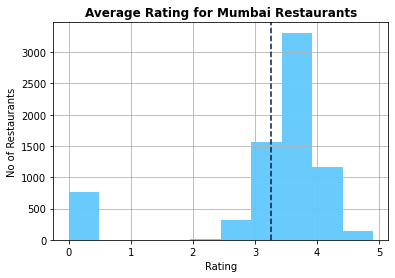

In [ ]:
df.Rating.hist(color='#68cbfc')
plt.axvline(x= df.Rating.mean(),ls='--',color='#091a4a')
plt.title('Average Rating for Mumbai Restaurants',weight='bold')
plt.xlabel('Rating')
plt.ylabel('No of Restaurants')
print(df.Rating.mean())

Rating

([<matplotlib.patches.Wedge at 0x7fa23d1ddc90>,
 [Text(1.0828856907819948, 0.19328367934101973, '2<Rating<3'),
  Text(-1.0524563906560627, 0.319899274408701, '3<Rating<4'),
  Text(0.979871512065646, -0.49985179787831585, 'Rating>4')],
 [Text(0.5906649222447243, 0.10542746145873803, '6%'),
  Text(-0.5740671221760341, 0.17449051331383686, '79%'),
  Text(0.534475370217625, -0.27264643520635407, '15%')])

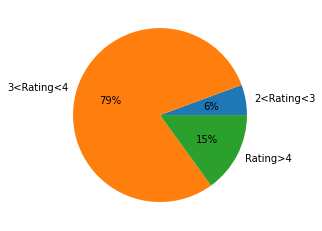

In [ ]:
Rating = [((df['Rating']>2)&(df['Rating']<3)).sum(),
         ((df['Rating']>3)&(df['Rating']<4)).sum(),
         (df['Rating']>4).sum()]

name = ['2<Rating<3', '3<Rating<4', 'Rating>4']
plt.pie(Rating, labels=name, autopct='%0.f%%')

Rating vs Restaurant Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

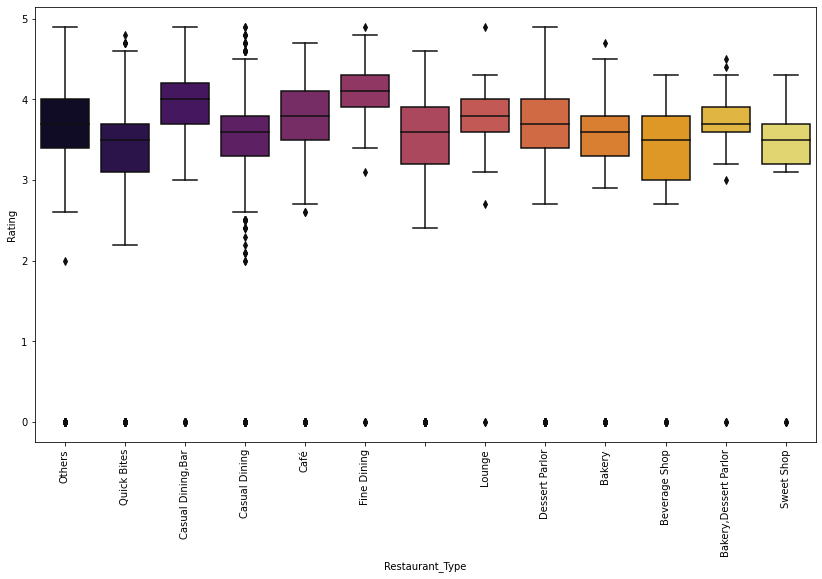

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Restaurant_Type',y='Rating',data=df,palette='inferno')
plt.xticks(rotation='90')

# Building The Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['Cuisines','Features','Operational_hours','Restaurant_Location','Restaurant_Name',	'Restaurant_Type','Rating'])
Y = df['Rating']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7285, 9) (5828, 9) (1457, 9)


In [ ]:
from sklearn.metrics import r2_score

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DT = DecisionTreeRegressor()

In [ ]:
DT.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_pred1 = DT.predict(X_test)
r2_score(Y_test,y_pred1)

0.8727838156489138

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF = RandomForestRegressor(n_estimators=100, random_state=0)

In [ ]:
RF.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
Y_predict = RF.predict(X_test)
r2_score(Y_test,Y_predict)

0.9206640180584895

## Actual vs Predicted

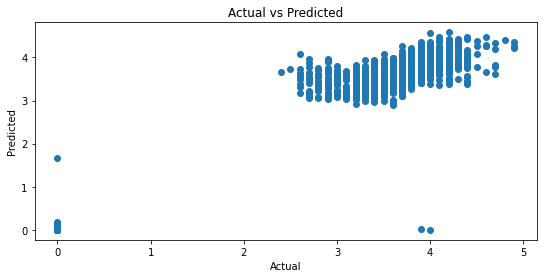

In [ ]:
plt.figure(figsize=(9,4))
plt.scatter(Y_test,Y_predict)
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
df.head()

,Additional_outlet_count,Cost_for_two,Cuisines,Delivery_Time,Features,Home_Delivery,Operational_hours,Restaurant_Location,Restaurant_Name,Restaurant_Type,Delivery_cost,Rating,votes,Cuisine_count,Feature_count,Rest_type_count
0,1,1500,"Finger Food, Continental, European, Italian",45,"Food Hygiene Rated Restaurants In Mumbai, Best...",0,12noon – 1am (Mon-Sun),Kamala Mills Compound,Lord of the Drinks,Others,76,4.9,1326,4,2,2
1,1,800,Pizza,45,"Value For Money, Best of Mumbai",0,11am – 12:30AM (Mon-Sun),Malad West,Joey's Pizza,Quick Bites,76,4.6,5974,1,2,1
2,4,2500,Seafood,45,"Super Seafood, Best of Mumbai",0,"Closed (Mon),12noon – 3pm, 7pm – 12midnight...","Linking Road, Bandra West",Bastian,"Casual Dining,Bar",76,4.5,1438,1,2,2
3,4,1800,"Finger Food, Continental",45,"Where's The Party?, Best of Mumbai, Food Hygie...",0,12noon – 1am (Mon-Sun),Lower Parel,Tamasha,Others,76,4.9,3275,2,3,2
4,2,450,"North Indian, Street Food, Fast Food, Chinese",45,,1,"12noon – 4pm, 7pm – 11:45pm (Mon-Sun)",Vashi,Bhagat Tarachand,Casual Dining,0,4.1,1422,4,1,1


In [ ]:
d1 = df.drop(columns=['Cuisines','Features','Operational_hours','Restaurant_Location','Restaurant_Name','Restaurant_Type'])
d1.head()

,Additional_outlet_count,Cost_for_two,Delivery_Time,Home_Delivery,Delivery_cost,Rating,votes,Cuisine_count,Feature_count,Rest_type_count
0,1,1500,45,0,76,4.9,1326,4,2,2
1,1,800,45,0,76,4.6,5974,1,2,1
2,4,2500,45,0,76,4.5,1438,1,2,2
3,4,1800,45,0,76,4.9,3275,2,3,2
4,2,450,45,1,0,4.1,1422,4,1,1


In [ ]:
d1.to_csv(r'C:\project\zomato_df.csv')